In [1]:
%matplotlib widget

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False):
    columns = [c for c in df.columns if c_filter in c]
    gd = df.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd[columns].plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [103]:
!scp -r osnielteixeira@200.20.15.153:~/experiments/. ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=175-step=1407999.ckpt                   100%   90KB   1.7MB/s   00:00    
hparams.yaml                                  100%  104     3.0KB/s   00:00    
metrics.csv                                   100% 1470KB  15.3MB/s   00:00    
epoch=9-step=79999.ckpt                       100%   90KB   2.1MB/s   00:00    
hparams.yaml                                  100%  104     3.8KB/s   00:00    
metrics.csv                                   100%   90KB   2.2MB/s   00:00    
epoch=20-step=167999.ckpt                     100%   90KB   2.8MB/s   00:00    
hparams.yaml                                  100%  104     4.6KB/s   00:00    
metrics.csv                                   100%  180KB   2.8MB/s   00:00    


In [104]:
# dataset = './experiments/2024-05-14 2025/0/metrics.csv'
# dataset = './experiments/2024-05-28 1948/0/metrics.csv'
# dataset = './experiments/2024-05-28 2240/0/metrics.csv'
# dataset = './experiments/2024-05-29 1249/0/metrics.csv'
# metrics_path = './experiments/2024-05-30 1732/1/metrics.csv'
# metrics_path = './experiments/2024-06-02 1211/0/metrics.csv'
# metrics_path = './experiments/2024-06-14 1749/0/metrics.csv'
metrics_path = './experiments/2024-06-19 2231/0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [105]:
# display(metrics, 'mvc', 'MVC Score')

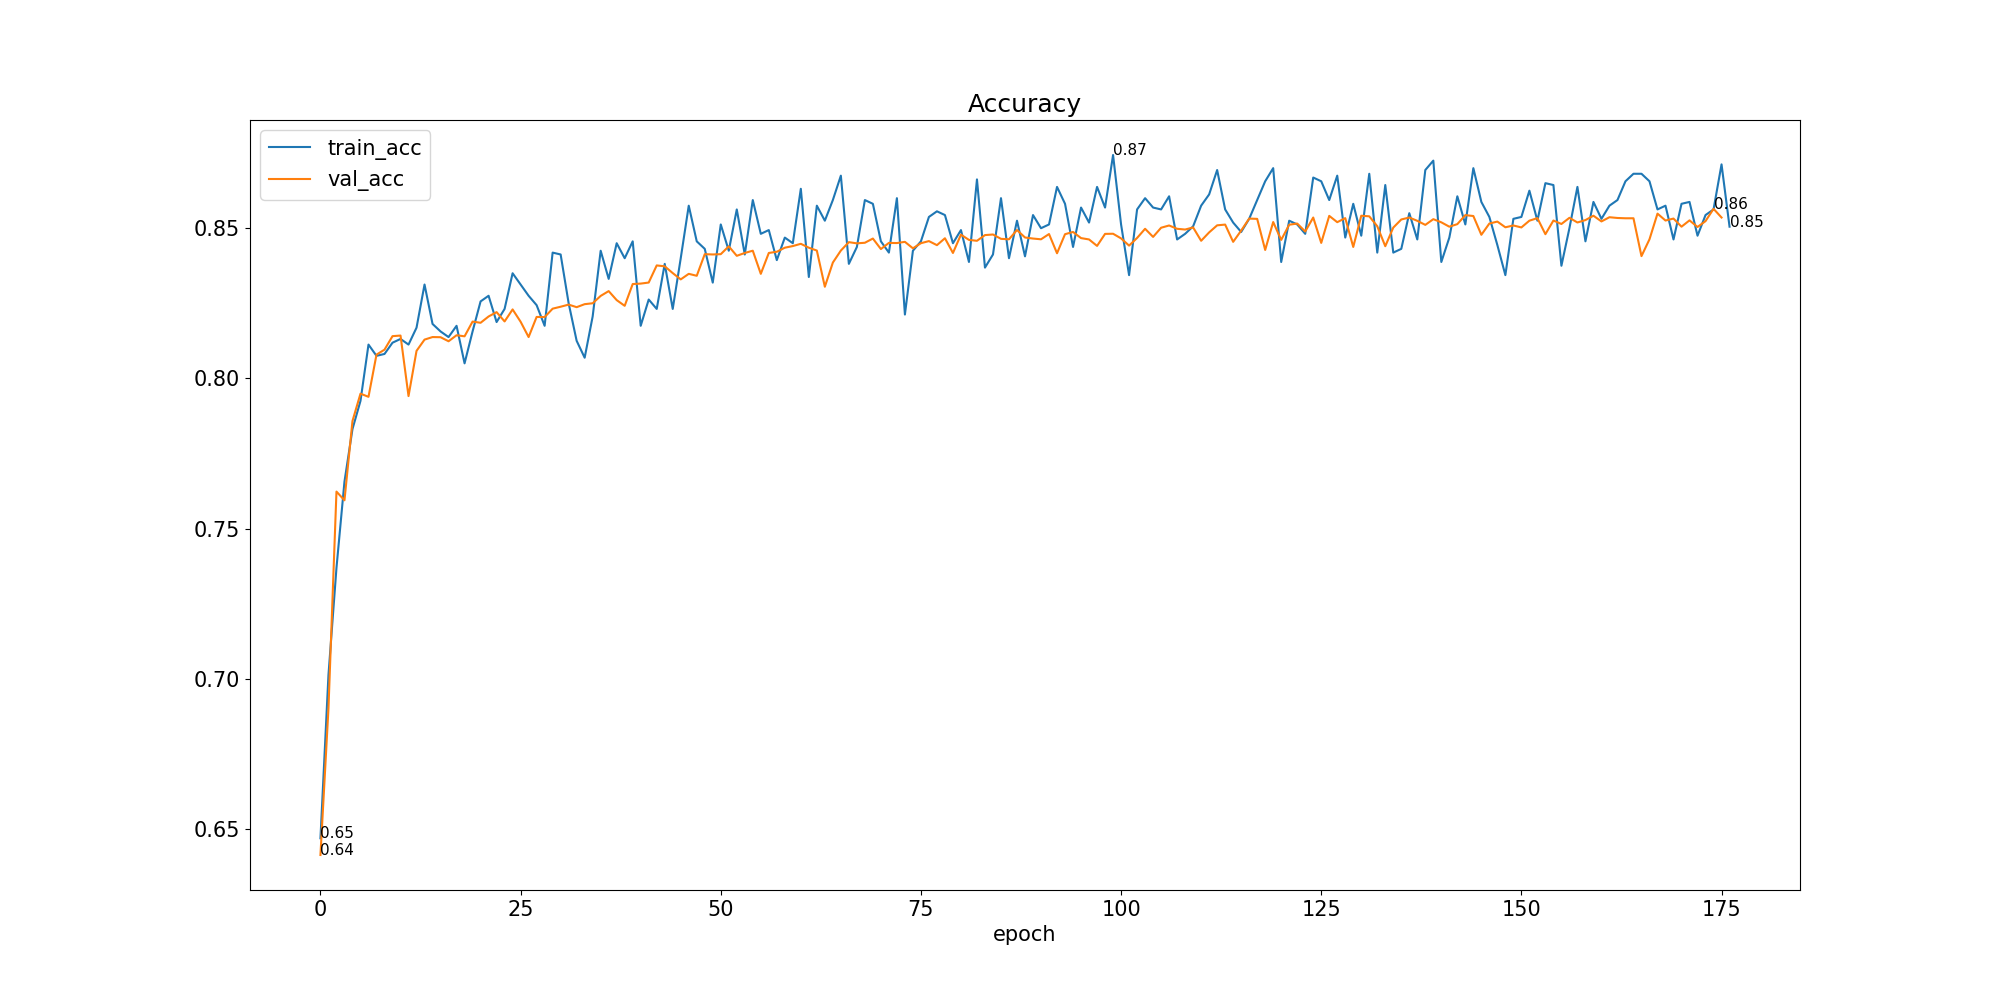

In [106]:
display(metrics, 'acc', 'Accuracy')

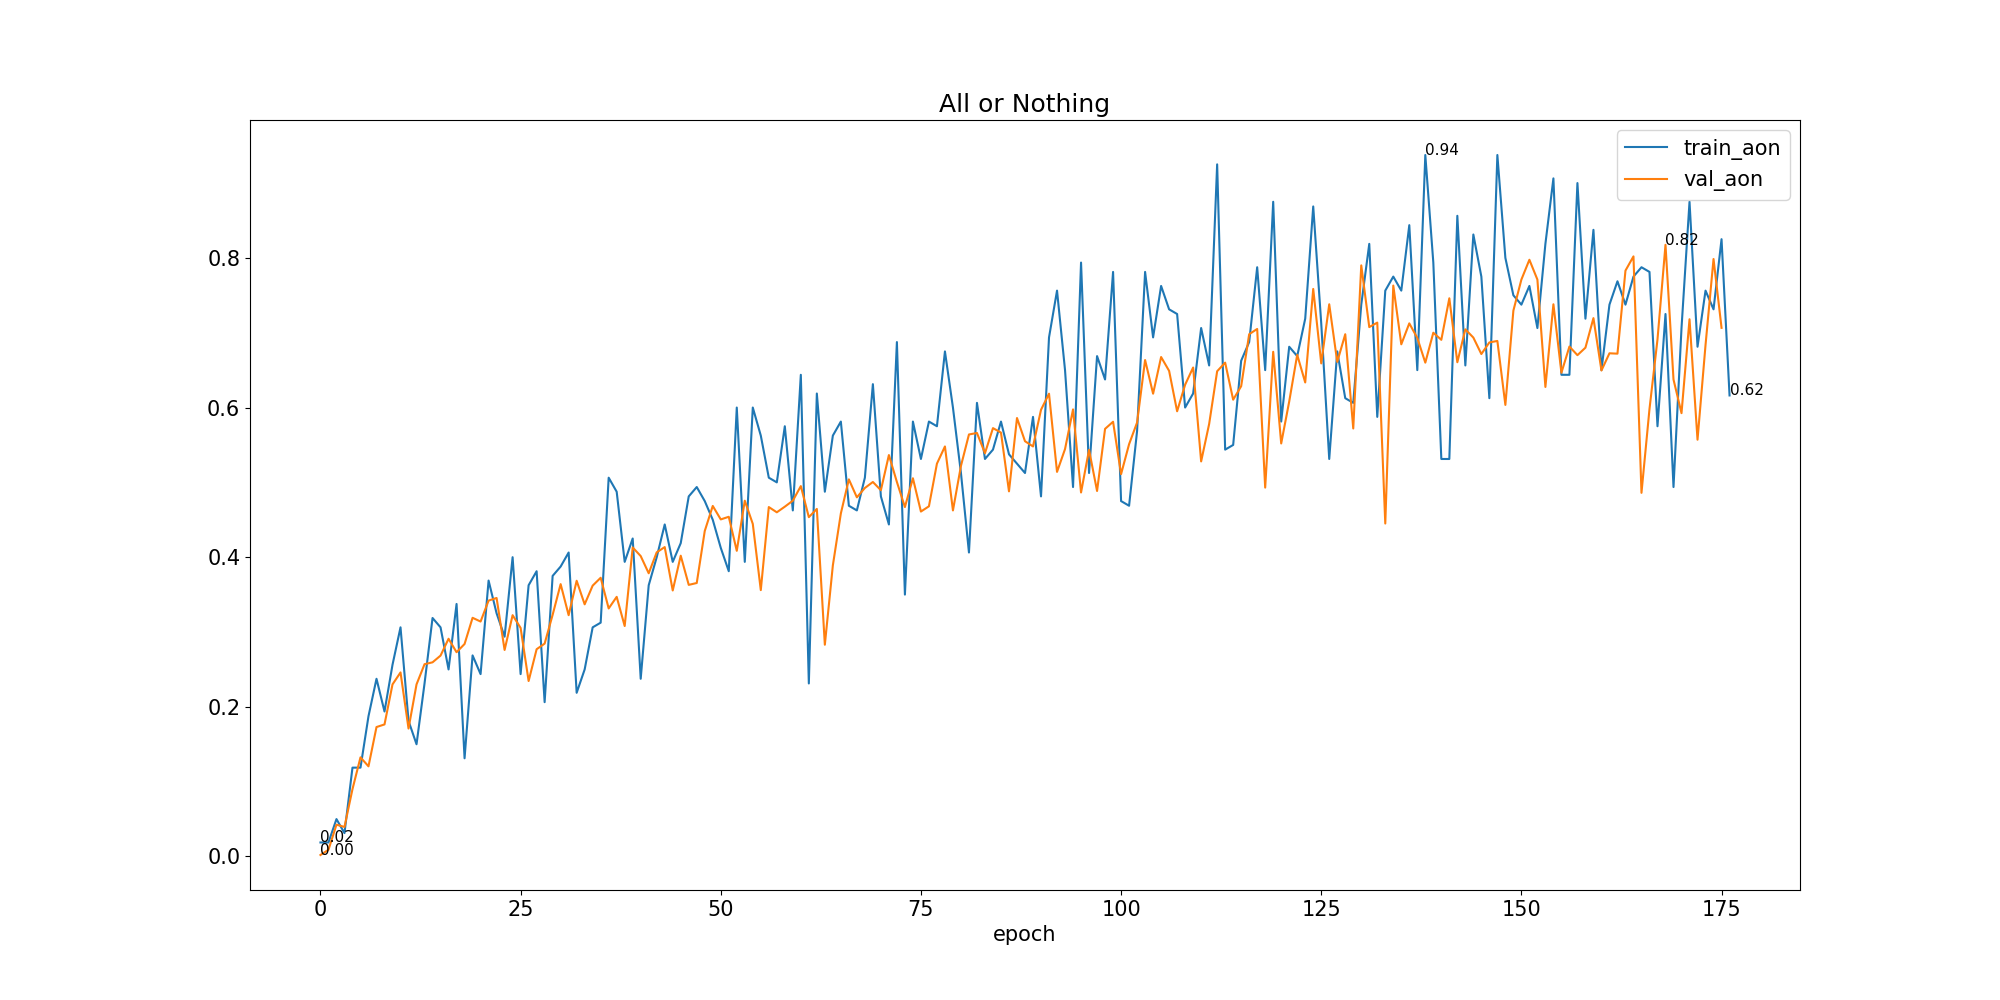

In [107]:
display(metrics, 'aon', 'All or Nothing')

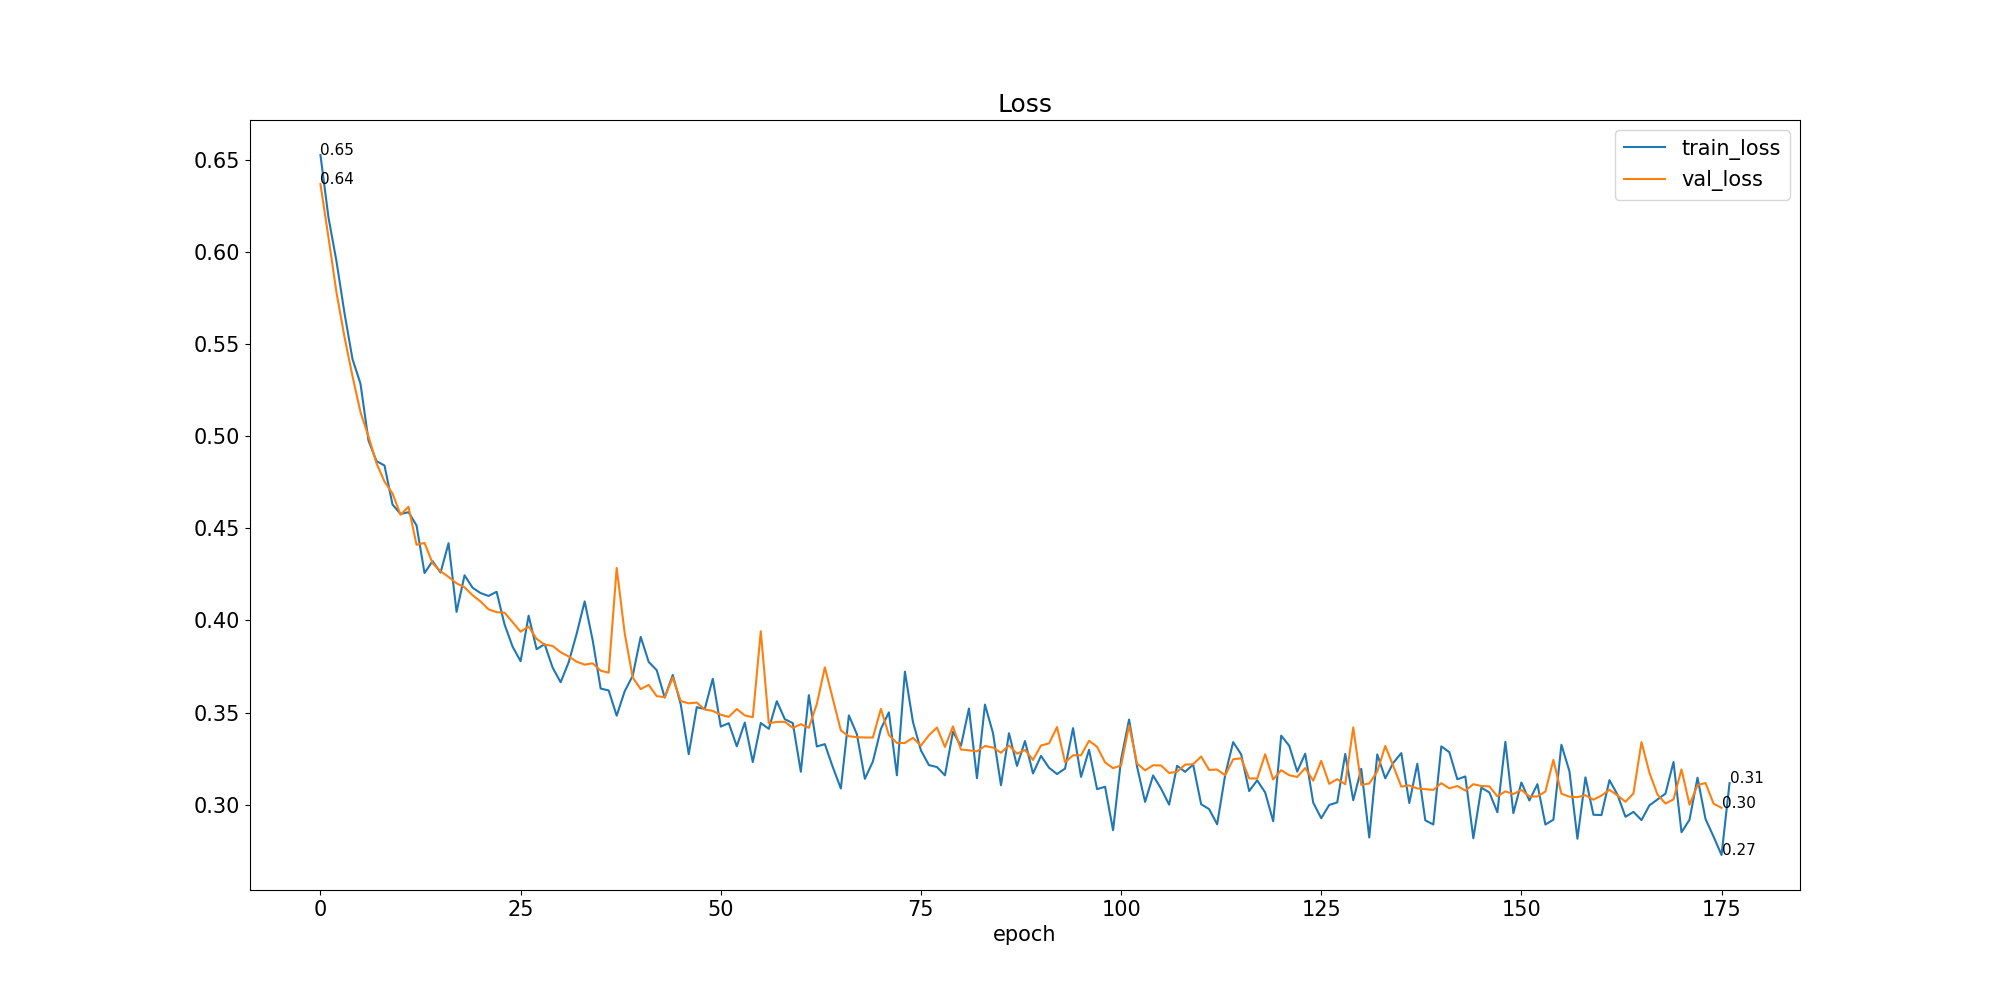

In [108]:
display(metrics, 'loss', 'Loss')

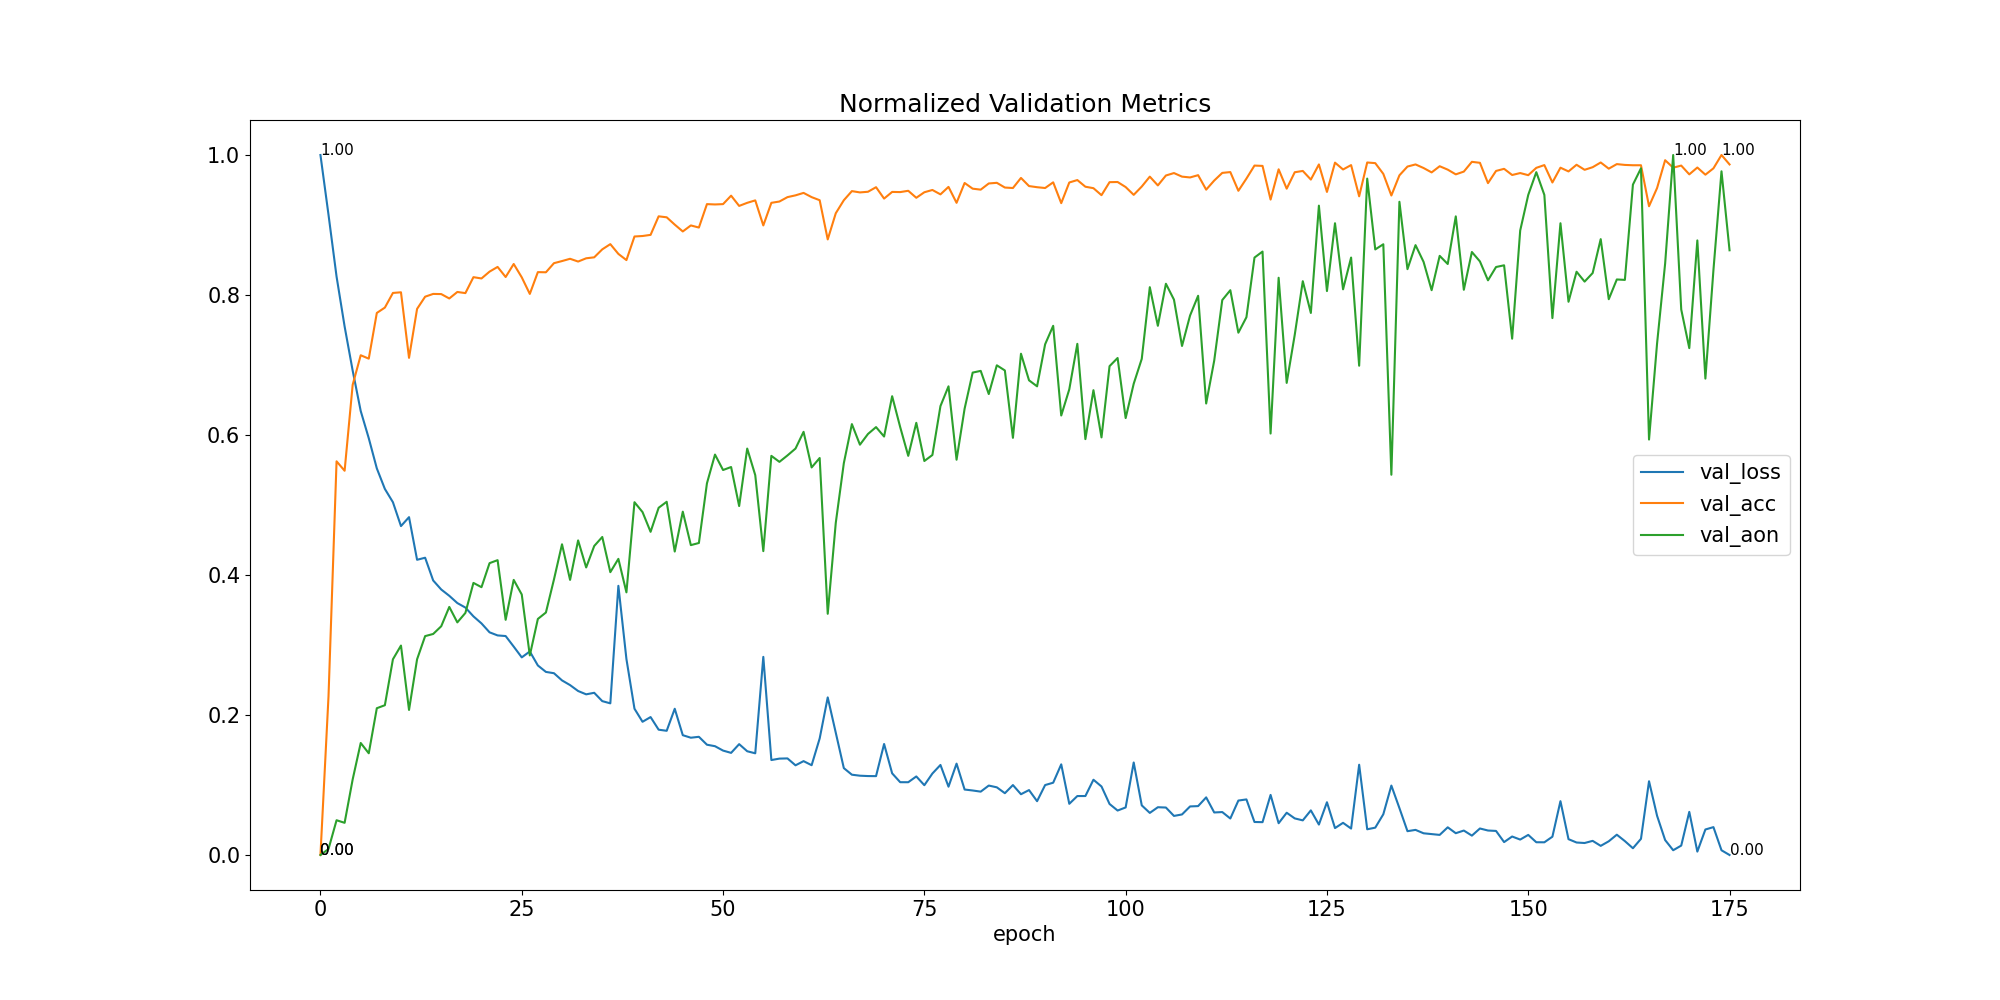

In [109]:
display(metrics, 'val', 'Normalized Validation Metrics', normalize=True)

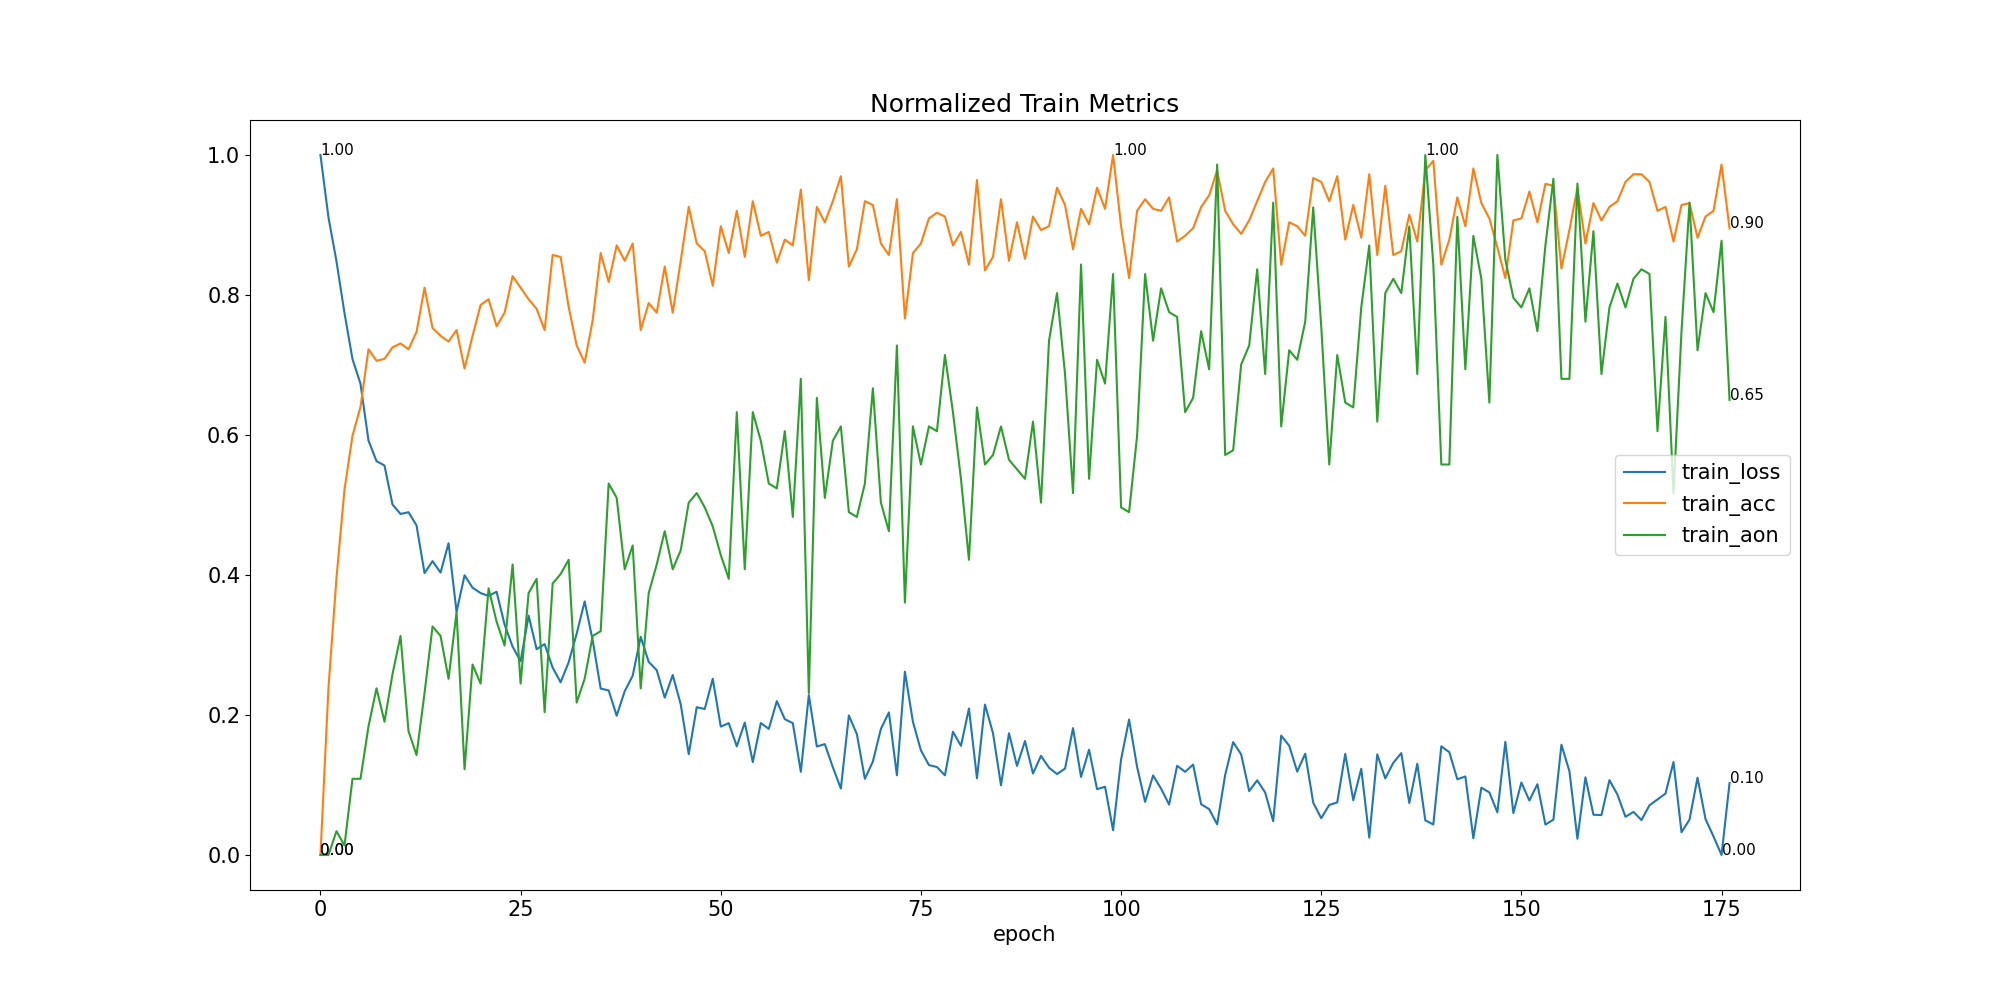

In [110]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [111]:
for ax in axes:
    plt.close(ax.get_figure())